In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Proyecto')

Mounted at /content/drive


In [32]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import shutil
from glob import glob
from sklearn.utils import shuffle
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [33]:

!pip3 install pickle5
import pickle5 as pickle
with open('data_new_small.pickle', "rb") as fh:
  df_data = pickle.load(fh)

In [34]:
df_data.head()

,label
id,
0a47d53ab3d01e5e49ffa038ff1e272de21fac7b,1
fe98e3e78c7706cce0422fb5c5d3571d1d11626a,1
401ed2905877a6bb7c411408187cb36324c8a1ab,1
1697774bba9213f676f82649a3732d12a41f9d5c,1
880680a2e66c449d5fd04aa440e04b3fc5292055,1


In [35]:
y = df_data['label']
df_train, df_val = train_test_split(df_data, test_size=0.5, random_state=1, stratify=y)

In [36]:
train_path='train_dir'
valid_path='val_dir'
num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
IMAGE_SIZE = 48

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = test_datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Model propuesto

In [38]:
print(len(df_train),len(df_val))
kernel_size=(3,3)
pool_size=(2,2)
print(len(df_train),len(df_val))
first_filters=32
second_filters=64
third_filters=128
kernel_size=(3,3)
pool_size=(2,2)
dropout_conv = 0.3
dropout_dense=0.3

5000 5000
5000 5000


In [44]:
model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (48, 48, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 64)       

In [45]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [46]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.0001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                   callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 15s 29ms/step - loss: 0.6934 - accuracy: 0.5059 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
500/500 [==============================] - 14s 29ms/step - loss: 0.6932 - accuracy: 0.5119 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
500/500 [==============================] - 15s 29ms/step - loss: 0.6934 - accuracy: 0.4956 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
500/500 [==============================] - 14s 28ms/step - loss: 0.6934 - accuracy: 0.4827 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
500/500 [==============================] - 14s 28ms/step - loss: 0.6932 - accuracy: 0.5054 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
500/500 [==============================] - 14s 28ms/step - loss: 0.6933 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
500/500 [==============================] - 14s 28ms/step - loss: 0.6932 - accuracy: 0.4928 - val_loss: 0.6931 - val_accuracy:

In [47]:
tf.keras.models.save_model(model,'my_model.hdf5')

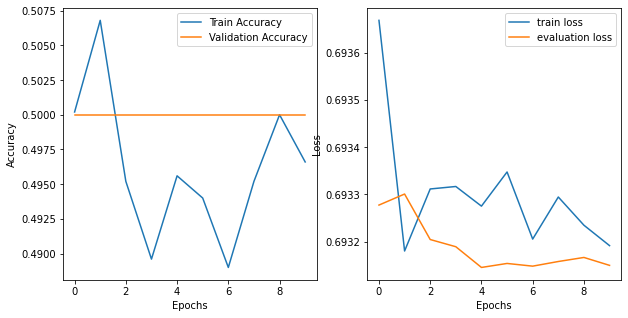

In [48]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [27]:
val_loss, val_acc = \
model.evaluate_generator(val_gen, 
                        steps=len(df_val))
print('val_loss:', val_loss)
print('val_acc:', val_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


val_loss: 0.6932120323181152
val_acc: 0.5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix


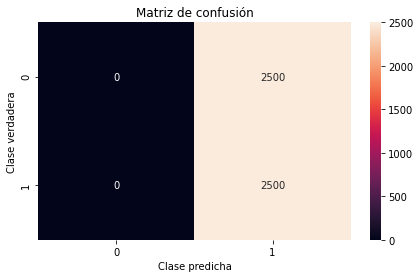

In [28]:
#Confution Matrix and Classification Report
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
num_of_test_samples = len(df_val)
batch_size= 10
Y_pred = model.predict_generator(val_gen, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(val_gen.classes, y_pred)
fig = plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, xticklabels=['0','1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase predicha')
plt.show()


In [29]:
print('Classification Report')
target_names = ['0', '1']
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2500
           1       0.50      1.00      0.67      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo de transfer-learning

VGG16 MASTER


In [8]:
#@title **code** Load my first pre-trained CNN
model_A =  tf.keras.applications.VGG16(input_shape=(48,48,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [9]:
prediction_layer = tf.keras.layers.Dense(2, activation='sigmoid')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # To mobilenet cnns

In [10]:
model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [11]:
model_B_on_A.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [12]:
filepath = "modeltransfer.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.0001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model_B_on_A.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                   callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 2175s 4s/step - loss: 0.7081 - accuracy: 0.5724 - val_loss: 0.6475 - val_accuracy: 0.6374
Epoch 2/10
500/500 [==============================] - 15s 29ms/step - loss: 0.6385 - accuracy: 0.6401 - val_loss: 0.6167 - val_accuracy: 0.6860
Epoch 3/10
500/500 [==============================] - 14s 29ms/step - loss: 0.6080 - accuracy: 0.6925 - val_loss: 0.5965 - val_accuracy: 0.7022
Epoch 4/10
500/500 [==============================] - 14s 29ms/step - loss: 0.5872 - accuracy: 0.7170 - val_loss: 0.5827 - val_accuracy: 0.7360
Epoch 5/10
500/500 [==============================] - 15s 29ms/step - loss: 0.5729 - accuracy: 0.7211 - val_loss: 0.5720 - val_accuracy: 0.7386
Epoch 6/10
500/500 [==============================] - 14s 29ms/step - loss: 0.5648 - accuracy: 0.7239 - val_loss: 0.5642 - val_accuracy: 0.7398
Epoch 7/10
500/500 [==============================] - 15s 30ms/step - loss: 0.5542 - accuracy: 0.7271 - val_loss: 0.5582 - val_accuracy:

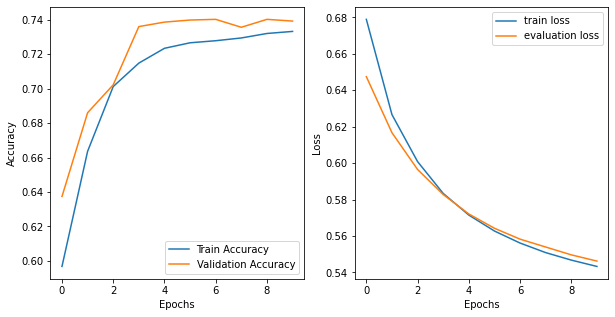

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [18]:
tf.keras.models.save_model(model_B_on_A,'my_model_transfer.hdf5')

In [28]:
val_loss, val_acc = \
model_B_on_A.evaluate_generator(val_gen, 
                        steps=len(df_val))
print('val_loss:', val_loss)
print('val_acc:', val_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


val_loss: 0.5461755394935608
val_acc: 0.7391999959945679


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix


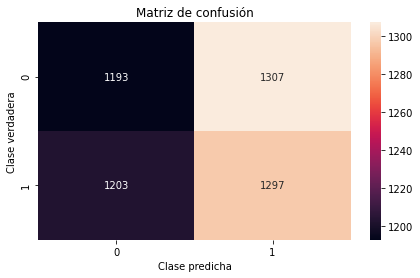

In [15]:

#Confution Matrix and Classification Report
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
num_of_test_samples = len(df_val)
batch_size= 10
Y_pred = model_B_on_A.predict_generator(val_gen, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(val_gen.classes, y_pred)
fig = plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, xticklabels=['0','1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase predicha')
plt.show()


In [16]:
print('Classification Report')
target_names = ['0', '1']
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      2500
           1       0.50      0.52      0.51      2500

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



Primero-VGG16

In [ ]:
#@title **code** Load my first pre-trained CNN
model_A =  tf.keras.applications.VGG16(input_shape=(48,48,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
prediction_layer = tf.keras.layers.Dense(2, activation='sigmoid')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # To mobilenet cnns

In [ ]:
model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [ ]:
#@title **code** Now  we fit the model to the new dataset
learning_rate= 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate)


model_B_on_A.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(train_gen, steps_per_epoch=train_steps, validation_data=val_gen, validation_steps=val_steps,
                                       epochs=10, verbose=1)

Epoch 1/10
500/500 [==============================] - 15s 29ms/step - loss: 0.6174 - accuracy: 0.6727 - val_loss: 0.5459 - val_accuracy: 0.7340
Epoch 2/10
500/500 [==============================] - 14s 28ms/step - loss: 0.5463 - accuracy: 0.7251 - val_loss: 0.5291 - val_accuracy: 0.7398
Epoch 3/10
500/500 [==============================] - 14s 28ms/step - loss: 0.5263 - accuracy: 0.7386 - val_loss: 0.5199 - val_accuracy: 0.7478
Epoch 4/10
500/500 [==============================] - 14s 29ms/step - loss: 0.5114 - accuracy: 0.7465 - val_loss: 0.5228 - val_accuracy: 0.7464
Epoch 5/10
500/500 [==============================] - 14s 28ms/step - loss: 0.5129 - accuracy: 0.7439 - val_loss: 0.5140 - val_accuracy: 0.7540
Epoch 6/10
500/500 [==============================] - 14s 29ms/step - loss: 0.4942 - accuracy: 0.7630 - val_loss: 0.5039 - val_accuracy: 0.7618
Epoch 7/10
500/500 [==============================] - 14s 28ms/step - loss: 0.5057 - accuracy: 0.7596 - val_loss: 0.5018 - val_accuracy:

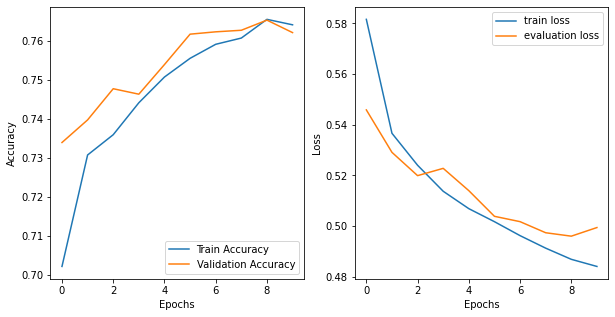

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

Segundo-MobileNetV2

In [ ]:
#@title **code** Load my first pre-trained CNN
model_A =  tf.keras.applications.MobileNetV2(input_shape=(48,48,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 24, 24, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 24, 24, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 24, 24, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
prediction_layer = tf.keras.layers.Dense(2, activation='sigmoid')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # To mobilenet cnns

In [ ]:
model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [ ]:
#@title **code** Now  we fit the model to the new dataset
learning_rate= 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate)


model_B_on_A.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(train_gen, steps_per_epoch=train_steps, validation_data=val_gen, validation_steps=val_steps,
                                       epochs=10, verbose=1)

Epoch 1/10
500/500 [==============================] - 20s 30ms/step - loss: 0.6391 - accuracy: 0.6746 - val_loss: 0.5120 - val_accuracy: 0.7602
Epoch 2/10
500/500 [==============================] - 14s 29ms/step - loss: 0.4833 - accuracy: 0.7718 - val_loss: 0.5702 - val_accuracy: 0.7304
Epoch 3/10
500/500 [==============================] - 15s 29ms/step - loss: 0.4996 - accuracy: 0.7508 - val_loss: 0.4952 - val_accuracy: 0.7646
Epoch 4/10
500/500 [==============================] - 15s 29ms/step - loss: 0.4407 - accuracy: 0.7988 - val_loss: 0.5419 - val_accuracy: 0.7410
Epoch 5/10
500/500 [==============================] - 15s 29ms/step - loss: 0.4358 - accuracy: 0.7988 - val_loss: 0.5380 - val_accuracy: 0.7476
Epoch 6/10
500/500 [==============================] - 14s 29ms/step - loss: 0.4168 - accuracy: 0.8090 - val_loss: 0.5092 - val_accuracy: 0.7686
Epoch 7/10
500/500 [==============================] - 14s 28ms/step - loss: 0.4061 - accuracy: 0.8141 - val_loss: 0.5206 - val_accuracy:

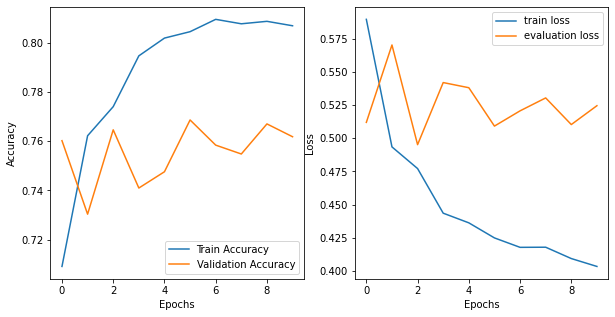

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

Tercer-EfficientNetB5

In [ ]:
#@title **code** Load my first pre-trained CNN
model_A =  tf.keras.applications.EfficientNetB5(input_shape=(48,48,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

115269632/115263384 [==============================] - 1s 0us/step
Model: "efficientnetb5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 48, 48, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 48, 48, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 49, 49, 3)    0           normalization[0][0]              
__________________

In [ ]:
prediction_layer = tf.keras.layers.Dense(2, activation='sigmoid')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # To mobilenet cnns

In [ ]:
model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [ ]:
#@title **code** Now  we fit the model to the new dataset
learning_rate= 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate)


model_B_on_A.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(train_gen, steps_per_epoch=train_steps, validation_data=val_gen, validation_steps=val_steps,
                                       epochs=10, verbose=1)

Epoch 1/10
500/500 [==============================] - 49s 74ms/step - loss: 0.7129 - accuracy: 0.4958 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 2/10
500/500 [==============================] - 34s 69ms/step - loss: 0.7117 - accuracy: 0.4977 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 3/10
500/500 [==============================] - 34s 69ms/step - loss: 0.7091 - accuracy: 0.5208 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
500/500 [==============================] - 34s 68ms/step - loss: 0.7096 - accuracy: 0.4954 - val_loss: 0.7153 - val_accuracy: 0.5000
Epoch 5/10
500/500 [==============================] - 34s 68ms/step - loss: 0.7082 - accuracy: 0.5135 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 6/10
500/500 [==============================] - 34s 68ms/step - loss: 0.7123 - accuracy: 0.5106 - val_loss: 0.7181 - val_accuracy: 0.5000
Epoch 7/10
500/500 [==============================] - 34s 68ms/step - loss: 0.7132 - accuracy: 0.5116 - val_loss: 0.6931 - val_accuracy:

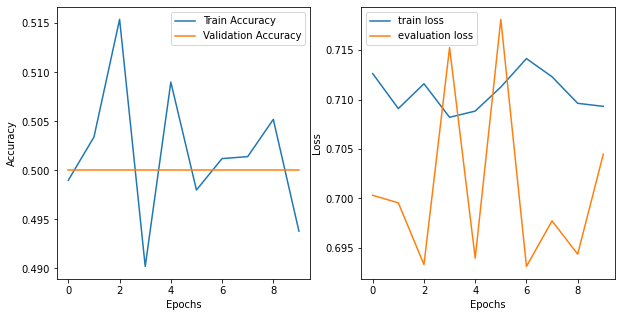

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

Cuarto-ResNet101V2


In [ ]:
#@title **code** Load my first pre-trained CNN
model_A =  tf.keras.applications.ResNet101V2(input_shape=(48,48,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

171319296/171317808 [==============================] - 1s 0us/step
Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 26, 26, 64)   0           conv1_conv[0][0]                 
_____________________

In [ ]:
prediction_layer = tf.keras.layers.Dense(2, activation='sigmoid')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # To mobilenet cnns

In [ ]:
model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])

In [ ]:
#@title **code** Now  we fit the model to the new dataset
learning_rate= 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate)


model_B_on_A.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(train_gen, steps_per_epoch=train_steps, validation_data=val_gen, validation_steps=val_steps,
                                       epochs=10, verbose=1)

Epoch 1/10
500/500 [==============================] - 32s 49ms/step - loss: 0.6581 - accuracy: 0.6269 - val_loss: 0.5901 - val_accuracy: 0.7044
Epoch 2/10
500/500 [==============================] - 23s 46ms/step - loss: 0.5516 - accuracy: 0.7207 - val_loss: 0.5743 - val_accuracy: 0.7178
Epoch 3/10
500/500 [==============================] - 23s 46ms/step - loss: 0.4969 - accuracy: 0.7679 - val_loss: 0.5730 - val_accuracy: 0.7236
Epoch 4/10
500/500 [==============================] - 23s 47ms/step - loss: 0.4849 - accuracy: 0.7706 - val_loss: 0.5705 - val_accuracy: 0.7274
Epoch 5/10
500/500 [==============================] - 23s 47ms/step - loss: 0.4636 - accuracy: 0.7844 - val_loss: 0.5788 - val_accuracy: 0.7232
Epoch 6/10
500/500 [==============================] - 23s 47ms/step - loss: 0.4637 - accuracy: 0.7834 - val_loss: 0.5799 - val_accuracy: 0.7216
Epoch 7/10
500/500 [==============================] - 23s 47ms/step - loss: 0.4470 - accuracy: 0.7945 - val_loss: 0.5936 - val_accuracy:

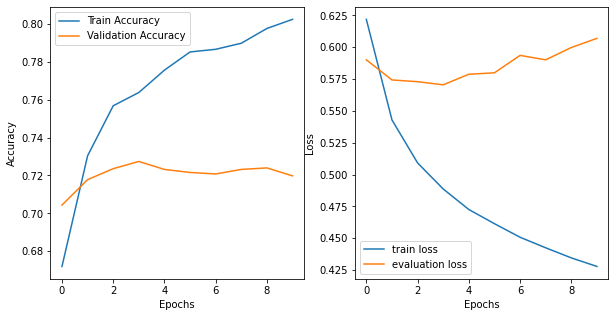

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

Quinto-Alexnet

In [ ]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(48,48,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(2))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 256)        

In [ ]:
#@title **code** Now  we fit the model to the new dataset
learning_rate= 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate)


AlexNet.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(train_gen, steps_per_epoch=train_steps, validation_data=val_gen, validation_steps=val_steps,
                                       epochs=10, verbose=1)

Epoch 1/10
500/500 [==============================] - 35s 71ms/step - loss: 0.7090 - accuracy: 0.5050 - val_loss: 0.7356 - val_accuracy: 0.5000
Epoch 2/10
500/500 [==============================] - 34s 69ms/step - loss: 0.7063 - accuracy: 0.4934 - val_loss: 0.7319 - val_accuracy: 0.5000
Epoch 3/10
500/500 [==============================] - 35s 69ms/step - loss: 0.7126 - accuracy: 0.5056 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 4/10
500/500 [==============================] - 34s 68ms/step - loss: 0.7088 - accuracy: 0.4976 - val_loss: 0.7015 - val_accuracy: 0.5000
Epoch 5/10
500/500 [==============================] - 34s 69ms/step - loss: 0.7087 - accuracy: 0.4986 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 6/10
500/500 [==============================] - 34s 69ms/step - loss: 0.7117 - accuracy: 0.5088 - val_loss: 0.7081 - val_accuracy: 0.5000
Epoch 7/10
500/500 [==============================] - 34s 69ms/step - loss: 0.7094 - accuracy: 0.4916 - val_loss: 0.7242 - val_accuracy:

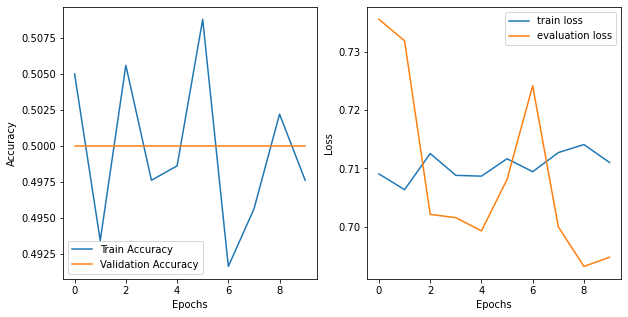

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

## Proposed model normal size

In [49]:
import pickle5 as pickle
with open('df_data.pickle', "rb") as fh:
  df_data = pickle.load(fh)

In [50]:
df_data.head()

,label
id,
0a47d53ab3d01e5e49ffa038ff1e272de21fac7b,1
fe98e3e78c7706cce0422fb5c5d3571d1d11626a,1
401ed2905877a6bb7c411408187cb36324c8a1ab,1
1697774bba9213f676f82649a3732d12a41f9d5c,1
880680a2e66c449d5fd04aa440e04b3fc5292055,1


In [51]:
y = df_data['label']
df_train, df_val = train_test_split(df_data, test_size=0.2, random_state=1, stratify=y)

In [54]:
train_path='training_dir'
valid_path='validation_dir'
num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
IMAGE_SIZE = 96

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [55]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = test_datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [56]:
model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "sigmoid"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 92, 92, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 42, 42, 64)        36928     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 40, 40, 64)       

In [57]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                   callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
153/800 [====>.........................] - ETA: 42:39 - loss: 0.7056 - accuracy: 0.4959

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

## Model Normal Size - Grayscale

In [67]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [68]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=to_grayscale_then_rgb)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = test_datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [69]:
model2 = Sequential()
model2.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (48, 48, 3)))
model2.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model2.add(MaxPooling2D(pool_size = pool_size))
model2.add(Dropout(dropout_conv))

model2.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model2.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model2.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model2.add(MaxPooling2D(pool_size = pool_size))
model2.add(Dropout(dropout_conv))

model2.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model2.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model2.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model2.add(MaxPooling2D(pool_size = pool_size))
model2.add(Dropout(dropout_conv))

model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(dropout_dense))
model2.add(Dense(2, activation = "sigmoid"))

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)       

In [70]:
model2.compile(Adam(lr=0.001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [71]:
filepath = "model2.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model2.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=10, verbose=1,
                   callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 24s 46ms/step - loss: 0.6944 - accuracy: 0.5048 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
500/500 [==============================] - 23s 47ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
500/500 [==============================] - 23s 46ms/step - loss: 0.6934 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
500/500 [==============================] - 23s 46ms/step - loss: 0.6933 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
500/500 [==============================] - 23s 46ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
500/500 [==============================] - 23s 46ms/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
500/500 [==============================] - 23s 46ms/step - loss: 0.6931 - accuracy: 0.5187 - val_loss: 0.6932 - val_accuracy:

In [77]:
tf.keras.models.save_model(model,'my_model2.hdf5')

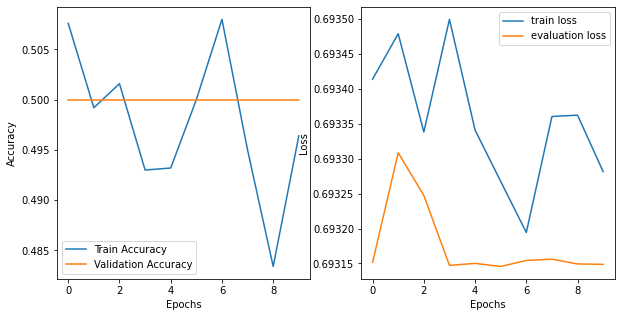

In [78]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [74]:
val_loss, val_acc = \
model2.evaluate_generator(val_gen, 
                        steps=len(df_val))
print('val_loss:', val_loss)
print('val_acc:', val_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


val_loss: 0.6931488513946533
val_acc: 0.5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix


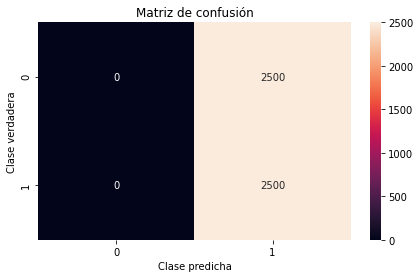

In [75]:
#Confution Matrix and Classification Report
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
num_of_test_samples = len(df_val)
batch_size= 10
Y_pred = model.predict_generator(val_gen, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(val_gen.classes, y_pred)
fig = plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, xticklabels=['0','1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase predicha')
plt.show()

In [76]:
print('Classification Report')
target_names = ['0', '1']
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2500
           1       0.50      1.00      0.67      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
